In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tellurium as te

## Functions

In [2]:
def find_model(start, filename):
    for root, dirs, files in os.walk(start):
        if filename in files:
            return os.path.join(root, filename)

In [3]:
start_dir = 'ChemE 546/Project'
file_model = 'multi_enzyme_model.txt'
file_path = find_model(start_dir, file_model)

In [4]:
print(file_path)

None


In [5]:
'''
# Load file and convert to SBML (if not already)
def load_model(filename, filetype): 
    """ Input the filename/path of the file, and its syntax.
    Output declares whether file was successfully loaded or not"""
    
    model_ant = "multi_enzyme_model.txt"
    with open(model_ant, "r") as file:
        model_content = file.read()

    try:
        model_sbml = te.antimonyToSBML(model_content)
        model_load = te.loadSBMLModel(model_sbml)
        print("Successfully loaded file.")
    except Exception as e:
        print("Could not load file.", e)
'''

'\n# Load file and convert to SBML (if not already)\ndef load_model(filename, filetype): \n    """ Input the filename/path of the file, and its syntax.\n    Output declares whether file was successfully loaded or not"""\n    \n    model_ant = "multi_enzyme_model.txt"\n    with open(model_ant, "r") as file:\n        model_content = file.read()\n\n    try:\n        model_sbml = te.antimonyToSBML(model_content)\n        model_load = te.loadSBMLModel(model_sbml)\n        print("Successfully loaded file.")\n    except Exception as e:\n        print("Could not load file.", e)\n'

In [6]:
# Load file and convert to SBML
# If file is in SBML, function will still load the model

def load_model(filename, filetype): 
    """ 
    filename: .txt, .csv, biomodels website
    filetype: ant, sbml
    
    Input the filename/path of the file, and its syntax.
    Output declares whether file was successfully loaded or not
    """
    model_ant = filename
    with open(model_ant, "r") as file:
        model_content = file.read()
    if filetype=='antimony':
        try:
            model_sbml = te.antimonyToSBML(model_content)
            model_load = te.loadSBMLModel(model_sbml)
            print(f"Successfully converted file '{filename}' from {filetype} to SBML and loaded.")
        except Exception as e:
            print("Could not load file.", e)
    else: 
        try:
            model_load = te.loadSBMLModel(model_content)
            print(f"Successfully loaded SBML file {filename}.")
        except Exception as e:
            print("Could not load SBML file.", e)
            
    return model_load

In [7]:
def simulate_model(model, t0, t1, steps):
    # load SBML model into tellurium
    r = te.loadSBMLModel(model)
    
    # simulate based on time interval and time steps
    result = r.simulate(t0, t1, steps) 
    
    # Convert to DataFrame
    species_names = r.getFloatingSpeciesIds()
    columns = ['Time'] + [str(i) for i in species_names]
    df = pd.DataFrame(data=result, columns=columns)
    
    return result, df, species_names

In [8]:
def export_csv(model):
    """
    Takes a solved model and exports it as a .csv in the same folder as the code.
    Appends the date and time to the beginning of the file name so repeats are not created.
    """
    # Grab current time and date, make variable to display date
    now = datetime.now()
    current_time = now.strftime("%Y%m%d_%H.%M.%S")
    
    # Save DataFrame to .csv
    model.to_csv(current_time + ' simulation_data.csv', index=False)
    
    return

In [37]:
# Plot specific species from a model simulation for comparison
def compare_species_plot(dataframe, species_list):
    """
    Creates a plot using a subset of all the species in the reaction (species_list) from a solved model (dataframe)
    """
    for species in species_list:
        plt.plot(dataframe['Time'], dataframe[species])
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.legend(species_list, fontsize = 'x-small', bbox_to_anchor=(1, 1))
    plt.show()

In [39]:
# Plot all species from a model simulation
def plot_all(dataframe):
    for species in species_names:
        plt.plot(dataframe['Time'], dataframe[species])
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.legend(species_names, fontsize = 'x-small', bbox_to_anchor=(1, 1))
    plt.show()

In [42]:
def modify_sim(input_file, species_edit, new_concentrations):
    # Add '=' string to confine search to the concentration block
    species_edit_append = [s + '=' for s in species_edit]
    #print(species_edit_append)
    
    # Create dummy model file with changes to concentrations
    with open(input_file, 'r') as file:
        lines = file.readlines()
    
        # Empty list that will contain all lines in the .txt
        modified_lines = []
        counter = 0
        
        # Modify each line in the list
        for line in lines:
            for s in range(len(species_edit_append)):
                # Identify if species to be changed are found in the line
                index = line.find(species_edit_append[s])
                # An index of -1 means that it is not found
                if index != -1:
                    # Rewrite the concentration to the one prescribed in new_concentrations
                    modified_line = line[:index + len(species_edit_append[s])] + new_concentrations[s] + '; \n'
                    print(modified_line)
                    modified_lines.append(modified_line)
            
            # If the a modified line was not added to modified_lines (as in, a change to a species was not changed), copy the line exactly
            if len(modified_lines) == counter:
                modified_lines.append(line)  
            counter += 1
        
        # Write the modified lines back to a temporary file
        with open('temp_model.txt', 'w') as file:
            file.writelines(modified_lines)

    # Load temporary model
    temp_model = load_model('temp_model.txt', 'antimony')

    # Simulate and assign variables to temp model
    result_temp, df_temp, species_names_temp = simulate_model(temp_model, 0, 50, 101)

    # Plot all, will be edited eventually
    plot_all(df_temp)

    # Delete the temporary model
    os.remove('temp_model.txt')

## Testing

In [11]:
# Load model
model = load_model('multi_enzyme_model.txt', 'antimony')

Successfully converted file 'multi_enzyme_model.txt' from antimony to SBML and loaded.


In [17]:
# Simulate and assign variables
sim_result, df, species_names = simulate_model(model, 0, 50, 101)

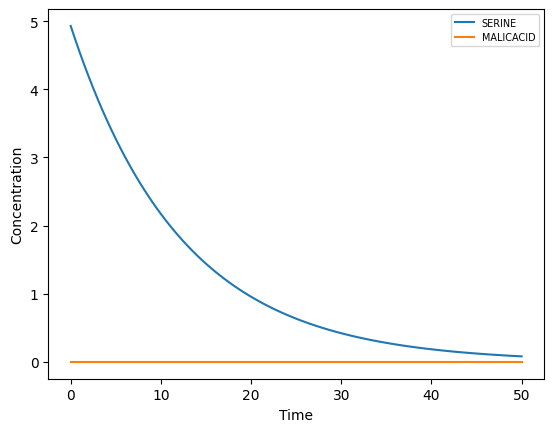

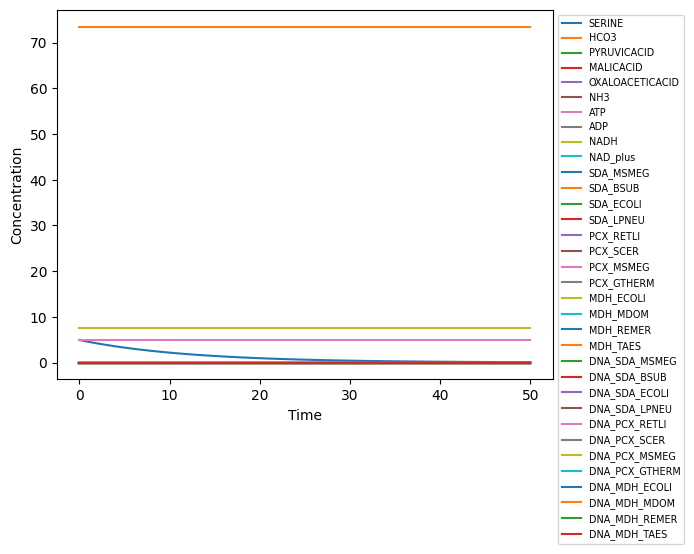

In [44]:
# Extract time and species data
time = df['Time'].values
species_data = df.iloc[:, 1:]

# Specify the subset of species to plot
# This list will have to be generated with the GUI such that each species selected gets appended.
species_list = ['SERINE', 'MALICACID']

#Plots
compare_species_plot(df, species_list)
plot_all(df)

SERINE=4.93095; 

HCO3=7; 

MALICACID=8; 

Successfully converted file 'temp_model.txt' from antimony to SBML and loaded.


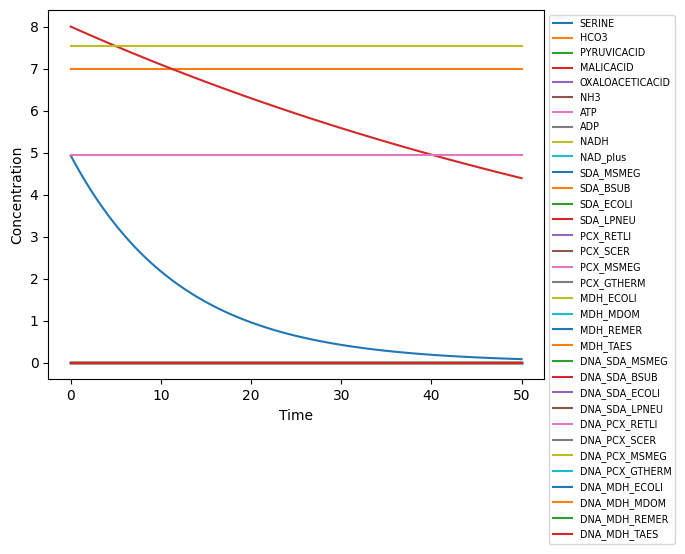

In [43]:
input_file = 'multi_enzyme_model.txt'              # Name of original model to be edited
species_edit = ['SERINE','HCO3', 'MALICACID']      # List of species to be edited, created by user in GUI
new_conc = ['4.93095', '7', '8']                   # New concentrations for each species, assigned by user in GUI

modify_sim(input_file, species_edit, new_conc)

#### Notes for GUI
##### User will need to specify:
- model file name and file type
- simulation time range and number of steps
- the species they wish to be displayed on the plot
- the species they want to change concentration for